In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import matplotlib.pyplot as plt
from nustar_tools.trackers import CoordinateTracker as ct
from nustar_tools.trackers.TrackerCorrelator import TrackerCorrelator

%matplotlib inline

## 2018-05-29, orbit 1

Pickle file does not exist: ./centroid_coordinates/20180529_80410201001_fpmA_2s_RAW_centroid.pkl
Saving coordinates to pickle: ./centroid_coordinates/20180529_80410201001_fpmA_2s_RAW_centroid.pkl


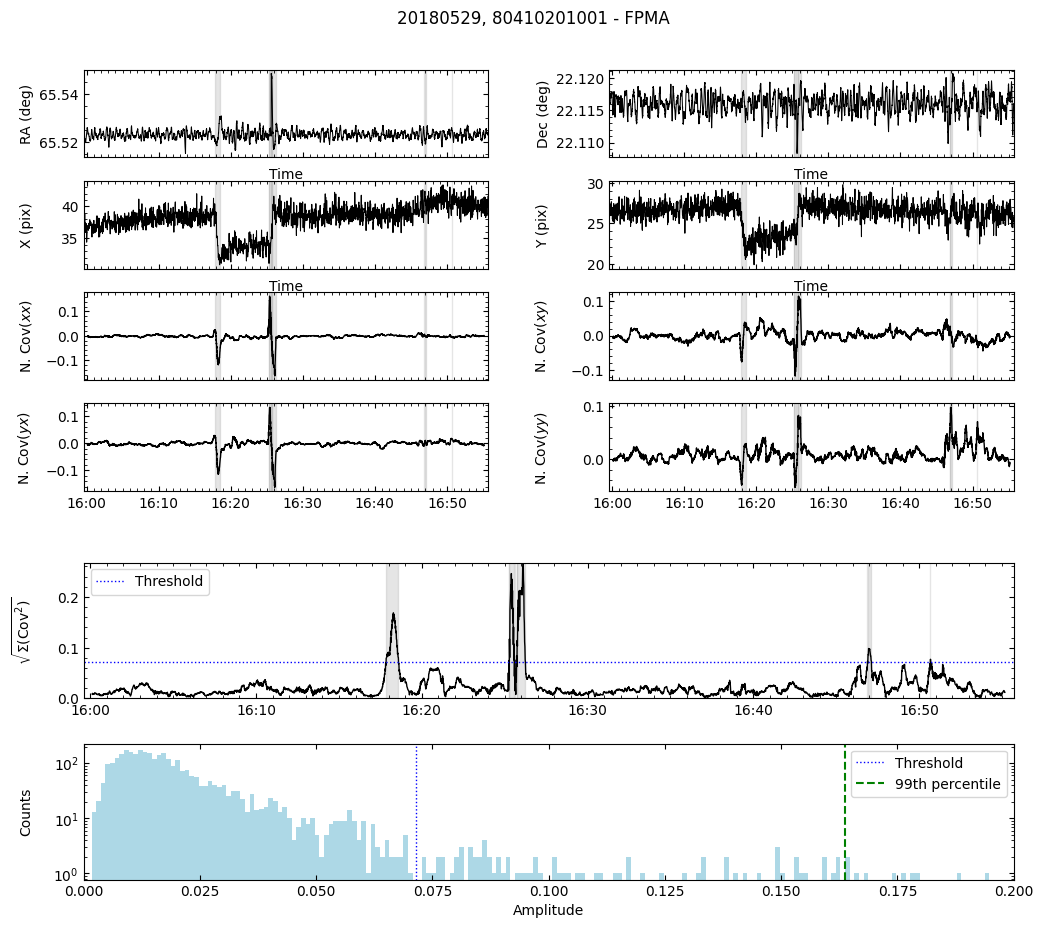

Pickle file does not exist: ./centroid_coordinates/20180529_80410201001_fpmB_2s_RAW_centroid.pkl
Saving coordinates to pickle: ./centroid_coordinates/20180529_80410201001_fpmB_2s_RAW_centroid.pkl


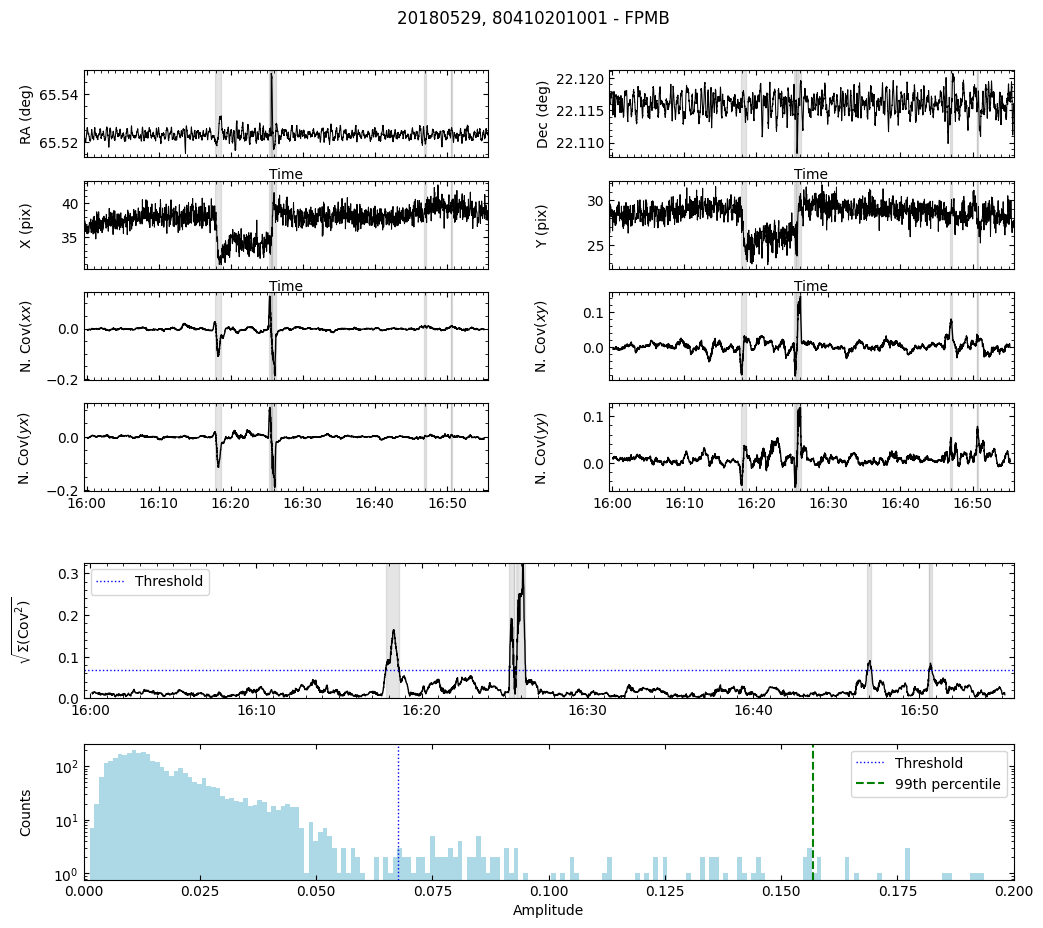

In [9]:
id_dir = '/home/reed/Documents/research/nustar/data/20180529/80410201001/'

for fpm in ['A', 'B']:

    time_range = ct.get_observation_time(id_dir, fpm)
    
    att_tracker = ct.AttitudeTracker(id_dir)
    att_tracker.read_data(time_range)

    raw_tracker = ct.CentroidTracker(id_dir, fpm, 2, 'RAW')
    raw_tracker.initialize()

    correlator = TrackerCorrelator(att_tracker, raw_tracker)
    correlator.correlate_trackers()
    correlator.make_overview()
    plt.show()

In [ ]:
print(att_tracker.times.__class__)
print(att_tracker.x.__class__)
print(att_tracker.z.__class__)
print(att_tracker.timestep.__class__)
print(att_tracker.x_key.__class__)
print(att_tracker.data_keys)
print(att_tracker.unit.__class__)
print(att_tracker.date.__class__, att_tracker.date)
print('obs_time:', att_tracker.observation_time.__class__, att_tracker.observation_time)

print(att_tracker.times[0].__class__)
print(att_tracker.nominal_coordinate[0].__class__)

<class 'astropy.table.column.Column'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'astropy.units.quantity.Quantity'>
<class 'NoneType'>
['TIME', 'POINTING']
<class 'str'>
<class 'str'> 20180529
obs_time: <class 'tuple'> (datetime.datetime(2018, 5, 29, 15, 59, 36, 10964, tzinfo=datetime.timezone.utc), datetime.datetime(2018, 5, 29, 16, 55, 42, 10964, tzinfo=datetime.timezone.utc))
<class 'datetime.datetime'>
<class 'float'>
